In [14]:
import numpy as np
import math
import pandas
import hvplot
import matplotlib.pyplot as plt
from ambiance import Atmosphere

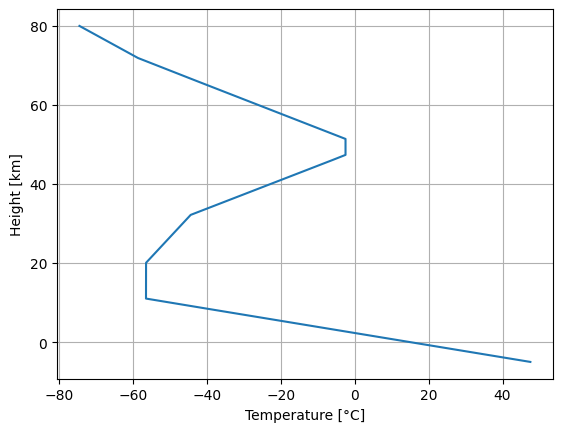

In [93]:
# Create an atmosphere object
heights = np.linspace(-5e3, 60e3, num=4000)
atmosphere = Atmosphere(heights,check_bounds=False)

# Make plot
plt.plot(atmosphere.temperature_in_celsius, heights/1000)
plt.ylabel('Height [km]')
plt.xlabel('Temperature [°C]')
plt.grid()
plt.show()

In [94]:
# https://www.grc.nasa.gov/www/k-12/Numbers/Math/Mathematical_Thinking/designing_a_high_altitude.htm

helium_m = 6.6e-27
k = 1.38e-23 # Boltzmann's constant (k = 1.38 X 10-23 j/K)

helium_density = (atmosphere.pressure*helium_m)/(k*atmosphere.temperature)

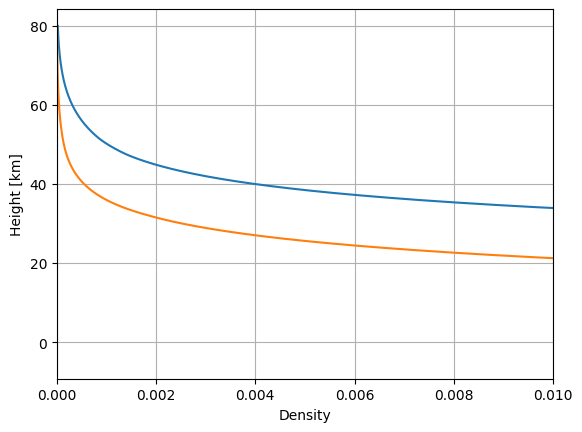

In [95]:


# Make plot
plt.plot(atmosphere.density, heights/1000)
plt.plot(helium_density, heights/1000)
plt.ylabel('Height [km]')
plt.xlabel('Density')
plt.xlim(0,0.01)
plt.grid()
plt.show()

In [96]:
from sympy import symbols, Eq, solveset

v_b, r_g, w, r_a = symbols("v_b r_g w r_a")

e = Eq(r_a*v_b, w + r_g*v_b)
solveset(e, v_b) # this is just to double check the math

{w/(r_a - r_g)}

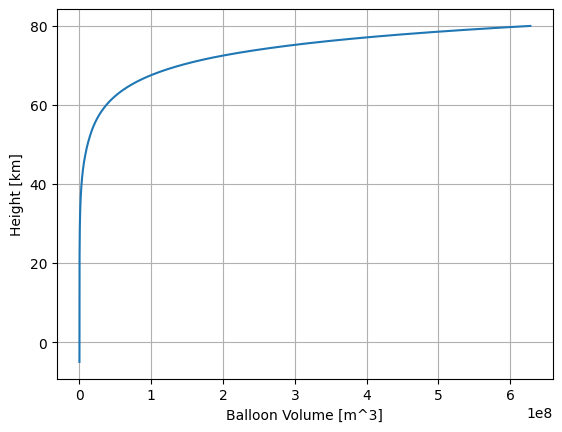

In [97]:
# Volume required for equilibrium i.e. no vertical acceleration
total_balloon_weight = 10e3
balloon_vol = total_balloon_weight / (atmosphere.density - helium_density)

# Make plot
plt.plot(balloon_vol, heights/1000)
plt.ylabel('Height [km]')
plt.xlabel('Balloon Volume [m^3]')
plt.grid()
plt.show()